In [1]:
%matplotlib inline

import pandas as pd


# Cargar

### Datos sobre Foursquare checkins en NYC, descargados desde [la página de Dingqi Yang](https://sites.google.com/site/yangdingqi/home/foursquare-dataset)

In [2]:
data = pd.read_table('dataset_ubicomp2013_checkins.txt', delim_whitespace=True,header=None,names=['user_id','venue_id'])

In [3]:
data.head()

,user_id,venue_id
0,35443,899
1,24973,42406
2,14860,177
3,222505,177
4,63524,609


In [ ]:
#para saber cuantos usuarios únicos tenemos:

In [4]:
len(data['user_id'].unique()) #data.unique() → vistas unicas

2060

In [5]:
data['checkin'] = 1 #→ agrega columna con valor 1

In [6]:
my_list = [1, 1, 1, 2, 3]

In [7]:
set(my_list)#set() → usuarios unicos

{1, 2, 3}

In [8]:
#si un usuario visita varias veces el mismo lugar no hará ninguna diferencia en la métrica de distancia para 
# jaccard, es por esto que quitaremos los duplicado en el conjunto de datos original

In [8]:
data.groupby(['user_id', 'venue_id']).count().sort_values('checkin',ascending = False) 
# data.groupby(['user_id', 'venue_id']).count() para saber si un usuario visito varias veces el mismo lugar 
# .sort_values('checkin',ascending:False) para organizar en forma descendente


,,checkin
user_id,venue_id,
51957,435580,149
51445,64971,92
17238,9209,86
8952,39242,74
133970,41096,73
39836,15743,72
38456,7999,69
59959,5222,63
17238,82634,55


In [9]:
data = data.drop_duplicates() # → remover duplicados

In [10]:
data.shape #→ dimensiones

(13472, 3)

# Transformar

In [11]:
data.head()

,user_id,venue_id,checkin
0,35443,899,1
1,24973,42406,1
2,14860,177,1
3,222505,177,1
4,63524,609,1


In [12]:
len(set(data['user_id'])) #usuarios únicos

2060

In [13]:
len(set(data['venue_id'])) #lugares únicos

2876

In [14]:
checkins_matrix = data.reset_index()\
    .pivot(index='venue_id', columns='user_id', values='checkin')\
    .fillna(0)\
    .astype(int)
    #si un usuario visitó un lugar se coloca un 1 sino un 0. 

In [15]:
checkins_matrix.head()

user_id,6,15,25,72,99,102,104,105,129,131,...,264033,264057,264722,264953,265643,265904,265965,266532,266576,266712
venue_id,,,,,,,,,,,,,,,,,,,,,
15,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
20,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
25,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
26,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
36,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [16]:
checkins_matrix.shape 
#Aquí validamos que la matrix es de 2876x2060. 

(2876, 2060)


# Visualizar

In [17]:
checkins_matrix.sum(axis=1)

venue_id
15          1
20         20
25         29
26          2
36         10
39          2
40          4
42          8
46         16
47         14
52          2
59          2
77          6
78          4
83          4
86          6
88          2
98          3
99          2
102         1
105        10
114         8
115         9
123        12
133         3
138         6
141         2
142         7
148         5
154         2
           ..
1170409     1
1210157     2
1225401     1
1283376     6
1285202     1
1337942     1
1443163     2
1450342     5
1598475     2
1654176     4
1719875     1
1742184     1
1760748    16
1782104     5
1809245     2
1930899     1
1930905     1
1944209     1
1945122     1
1948043     4
1995366     4
2053266     1
2067414     2
2133943     1
2154515     5
2167106     1
2232344     1
2302016     1
2376156     1
2422200     1
Length: 2876, dtype: int64

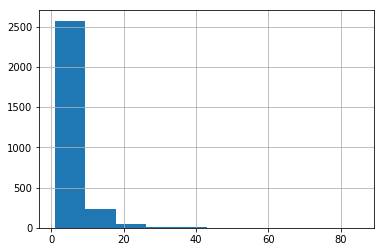

In [18]:
checkins_matrix.sum(1).hist() #la gran mayoria de lugares han sido visitado entre 0-10 veces

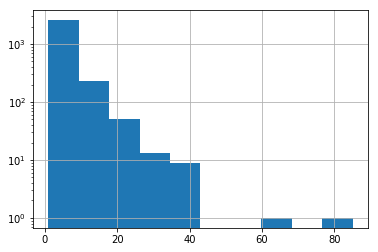

In [19]:
checkins_matrix.sum(1).hist(log=True) # Es otra opcion de visualizacion
# y nos dice que la diferencia entre los lugares que han sido visitado entre 0-10 y 10-20 se diferencian es 
# mas o menos una sola orden de magnitud. 

# Computar similaridades

In [ ]:
#Cada uno de los 2060 puntos tiene un lugar en el espacio vectorial. Si un punto queda cercano a otro es lo que
#se conoce como similaridad en el Espacio Vectorial. Y lo podemos usar para un sistema de recomendación

In [ ]:
# primero vemos un ejemplo desmenuzado de la funcion que más adelante se va a definir. 
# Tenemos dos lugares:

In [20]:
venue_1 = {1, 2, 4}

In [21]:
venue_2 = {3, 2, 4}

In [22]:
intersection = venue_1.intersection(venue_2) #queremos saber que usuarios visitan ambos lugares

In [23]:
intersection   # esta es la interseccion de los conjuntos. Que usuarios van a ambos lugares:

{2, 4}

In [24]:
len(intersection) # esta es la medida

2

In [25]:
union = venue_1.union(venue_2) # la union de ambos lugares. Conjunto de todos los usuarios

In [26]:
union 

{1, 2, 3, 4}

In [27]:
len(union)

4

In [28]:
len(intersection) / len(union) # ya con esto sabemos la similitud de Jaccard entre dos lugares. 
    #Si es similar es 1, si no es similar es 0

0.5

In [ ]:
# ahora si, definimos la funcion de similaridad entre dos lugares:

In [29]:
def jaccard_similarity(venue_1, venue_2):
    venue_1_user_indices = set( venue_1[venue_1 > 0].index )
    venue_2_user_indices = set( venue_2[venue_2 > 0].index )
    intersection_length = len(venue_1_user_indices.intersection(venue_2_user_indices))
    union_length = len(venue_1_user_indices.union(venue_2_user_indices))
    
    return intersection_length / union_length

In [ ]:
# funcion de similaridad dado un lugar en específico: 

In [30]:
def compute_pairwise_jaccard_similarities(query_venue_index):
    query_venue = checkins_matrix.ix[query_venue_index]
    candidate_venues = checkins_matrix.drop(query_venue_index, axis=0)
    similarities = {}
    
    for candidate_venue_id, candidate_venue in candidate_venues.iterrows():
        similarity = jaccard_similarity(query_venue, candidate_venue)
        similarities[candidate_venue_id] = similarity
        
    return pd.Series(similarities)

# Recomendar

In [ ]:
# Traemos la matrix sólo para saber los id de los lugares (venue_id)

In [31]:
checkins_matrix.head()

user_id,6,15,25,72,99,102,104,105,129,131,...,264033,264057,264722,264953,265643,265904,265965,266532,266576,266712
venue_id,,,,,,,,,,,,,,,,,,,,,
15,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
20,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
25,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
26,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
36,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
# Ahora construimos un sistema de recomendación dado un lugar (venue_id): 
# Que nos organice una lista de 5 de los lugares mas similares al lugar en cuestion

In [ ]:
while True:
    try:
        query_venue_index = int( input('Por favor ingresa tu lugar favorito: ') )
        print( compute_pairwise_jaccard_similarities(query_venue_index).sort_values(ascending=False).head(5) )
    except:
        pass

Por favor ingresa tu lugar favorito: 36


c:\envpython\entornovirtual\lib\site-packages\ipykernel_launcher.py:2: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  


46904      0.153846
1476       0.153846
1283376    0.142857
8613       0.105263
242095     0.100000
dtype: float64
Por favor ingresa tu lugar favorito: 25
105      0.083333
11792    0.058824
25967    0.058824
3582     0.058824
11945    0.057143
dtype: float64
Por favor ingresa tu lugar favorito: 26
2606      0.500000
12142     0.250000
96751     0.166667
32869     0.166667
407167    0.166667
dtype: float64


In [ ]:
# COn esto hemos construido un sencillo sistema de recomendacion. Vale mencionar que éstas recomendacion son tan
# buenas como se hayan definido los usuarios en el primer lugar.
# En este caso fue por los lugares que visitaron, pero podría ser por la hora de visita, el tiempo que pasan en 
# la web. Ya depende de nuestra creatividad para construir un sistema de recomendación